In [3]:
import segyio
from matplotlib import pyplot as plt
import numpy as np

### Load data
Using [segyio](https://github.com/equinor/segyio) we can load the segy cubes as numpy arrays.

In [4]:
#path_equinor = "D:/Machine_Learning/Xeek.ai/Fault_detection/Equinor Synthetic model"
#path_slb = "D:\Machine_Learning\Xeek.ai\Fault_detection\Schlumberger synthetic models"

filename_pp = "D:/Machine_Learning/Xeek.ai/Fault_detection/Equinor Synthetic model/issap20_Pp.sgy"
filename_ai = "D:/Machine_Learning/Xeek.ai/Fault_detection/Equinor Synthetic model/issap20_AI.sgy"
filename_fault = "D:/Machine_Learning/Xeek.ai/Fault_detection/Equinor Synthetic model/issap20_Fault.sgy"

In [5]:
# Load slb synthetics
path_slb_isFault = "D:/Machine_Learning/Xeek.ai/Fault_detection/Schlumberger synthetic models/Schlumberger_800_SLB_Force_Fault_Model_IsFault.segy"

In [6]:
# Note: the the xline header info location is at segyio.su.cdpx [181]
def segy2numpy(filename: str) -> np.array:
    with segyio.open(filename, xline=181) as segyfile:
        return segyio.tools.cube(segyfile)

seismic = segy2numpy(filename_pp)
ai = segy2numpy(filename_ai)
fault = segy2numpy(filename_fault)

In [7]:
print(type(seismic))
print(fault.shape)
print(np.unique(fault))

<class 'numpy.ndarray'>
(101, 589, 751)
[0. 1.]


In [8]:
f"Number of inlines: {seismic.shape[0]}, crosslines: {seismic.shape[1]}, samples: {seismic.shape[2]}"

'Number of inlines: 101, crosslines: 589, samples: 751'

In [11]:
def plot(synth, ai, fault, line_type, line_num):
    
    ILINE = line_num
    XLINE = line_num
    
    plt.figure(figsize=(10, 10))
    title = ['Synthetic_Seismic', 'AI']
    cmaps = ["seismic", None]
    
    print('\nPlotting ', line_type.upper(), ILINE)
    
    for i, cube in enumerate([synth, ai]):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
        
        if line_type == 'inline':
           
            plt.imshow(cube[ILINE,:, :].T, cmap=cmaps[i])
            plt.imshow(fault[ILINE,:, :].T, cmap='Greys',  vmin=0, vmax=1, alpha=0.3)
            plt.axis()
        elif line_type == 'xline':
           
            plt.imshow(cube[:,XLINE, :].T, cmap=cmaps[i])
            plt.imshow(fault[:,XLINE, :].T, cmap='Greys',  vmin=0, vmax=1, alpha=0.3)
            plt.axis()
    plt.show()
    
    


Plotting  INLINE 20


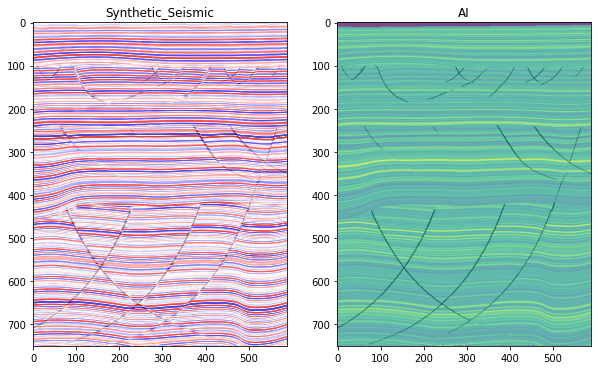

In [12]:
plot(seismic, ai, fault, line_type='inline', line_num=20)


Plotting  XLINE 50


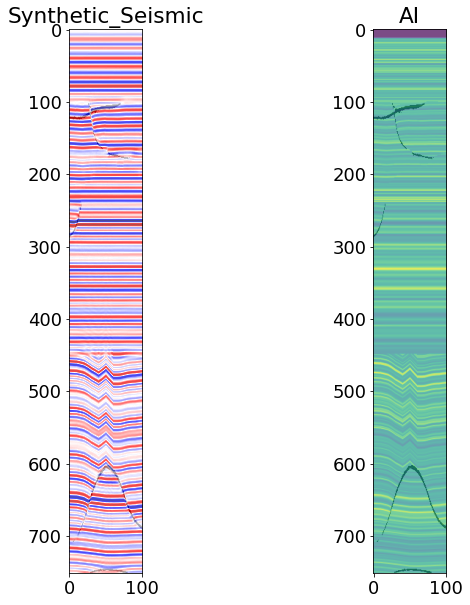

In [177]:
plot(seismic, ai, fault, line_type='xline', line_num=50)

In [178]:
import ipywidgets as widgets

In [181]:
widgets.Intslider()

AttributeError: module 'ipywidgets' has no attribute 'Intslider'

In [180]:
plot_output = widgets.Output()

plot_button = widgets.Button(
    description = 'Show images',
    disabled=False,
    button_style = '',
    tooltip = 'click to plot image.')

def on_button_clicked(b):
    plot_output.clear_output()
    with plot_output:
        plot(seismic, ai, fault, line_type='xline', line_num=50)

plot_button.on_click(on_button_clicked)

display(line_num)
display(plot_button)
display(plot_output)

NameError: name 'line_num' is not defined

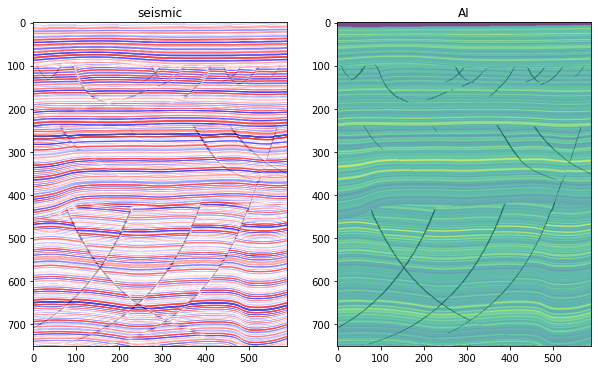

In [6]:
# plot inline
ILINE=20
plt.figure(figsize=(10, 10))
title = ['seismic', 'AI']
cmaps = ["seismic", None]

for i, cube in enumerate([seismic, ai]):
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    plt.imshow(cube[ILINE,:, :].T, cmap=cmaps[i])
    plt.imshow(fault[ILINE,:, :].T, cmap='Greys',  vmin=0, vmax=1, alpha=0.3)
    plt.axis()
plt.show()

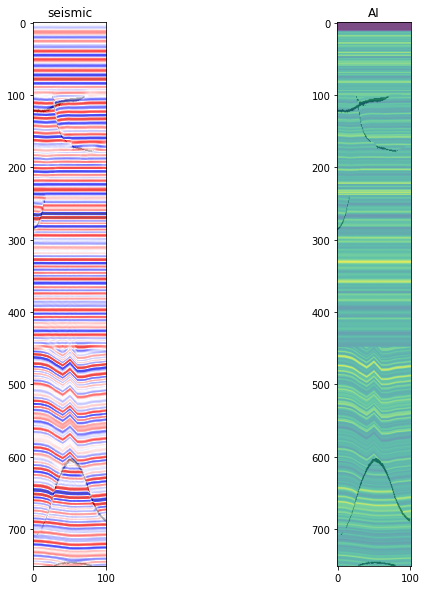

In [7]:
# plot crossline
XLINE=50
plt.figure(figsize=(10, 10))
title = ['seismic', 'AI']
cmaps = ["seismic", None]

for i, cube in enumerate([seismic, ai]):
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    plt.imshow(cube[:,XLINE, :].T, cmap=cmaps[i])
    plt.imshow(fault[:,XLINE, :].T, cmap='Greys',  vmin=0, vmax=1, alpha=0.3)
    plt.axis()
plt.show()

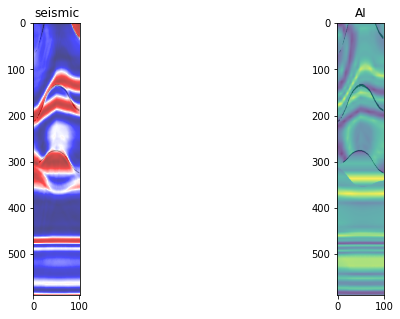

In [19]:
# plot crossline
DEPTH=700
plt.figure(figsize=(10, 5))
title = ['seismic', 'AI']
cmaps = ["seismic", None]

for i, cube in enumerate([seismic, ai]):
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    plt.imshow(cube[:,:, DEPTH].T, cmap=cmaps[i])
    plt.imshow(fault[:,:, DEPTH].T, cmap='Greys',  vmin=0, vmax=1, alpha=0.3)
    plt.axis()
plt.show()

In [ ]:
# Load slb synthetics
path_slb_isFault = "D:/Machine_Learning/Xeek.ai/Fault_detection/Schlumberger synthetic models/Schlumberger_800_SLB_Force_Fault_Model_IsFault.segy"


In [138]:
fault_slb = segy2numpy(path_slb_isFault)

In [139]:
fault_slb.shape

(1, 45451, 901)

In [ ]:
plt.imshow()

The following data exploration is by [Ben Lasscock](https://github.com/blasscoc/easy-as/blob/master/notebooks/Access%20Ichthys3D%20Seismic%20Data.ipynb).

In [9]:
import s3fs
import zarr

In [10]:
# Location of the segy data in "ZArr format"
data_path='s3://zarr-depot/seismic/Ichthys3D/Ichthys 3D seismic for fault competition'

S3Fs is a Pythonic file interface to S3. It provides a convenient API for accessing data stored on S3. These next few lines set up a connection to the remote seismic data, and create an object we can use to access the data.

In [11]:
# complicated stuff to access the data
client = s3fs.S3FileSystem(anon=True)
store = s3fs.S3Map(
    root=data_path,
    s3=client, 
    check=False)
cache = zarr.LRUStoreCache(store, max_size=2**28)
# contains the seqy data for Ichthys3D
seismic_data = zarr.open_group(store=cache, mode='r')

That's it - now we can read the seismic data as if it was local. The top level segy_data object is similar to a dictionary:

In [12]:
# list contents:
[i for i in seismic_data.keys()]

['coordinates',
 'indptr',
 'inline',
 'inlines',
 'map_inline_ends',
 'map_latitude',
 'map_longitude',
 'map_xline_ends',
 'trace_inlines',
 'trace_xlines',
 'xline',
 'xlines']

In [13]:
# Inspect the inline and xline ranges

print("inline range: ", seismic_data['inlines'][:].min(),"-", seismic_data['inlines'][:].max())
print("xline range: ", seismic_data['xlines'][:].min(), "-", seismic_data['xlines'][:].max())


inline range:  1001 - 3400
xline range:  2040 - 3040


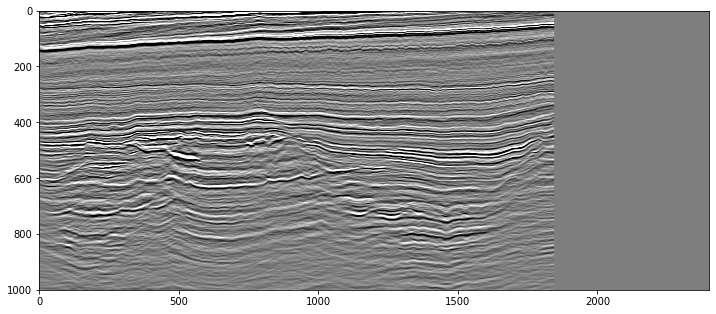

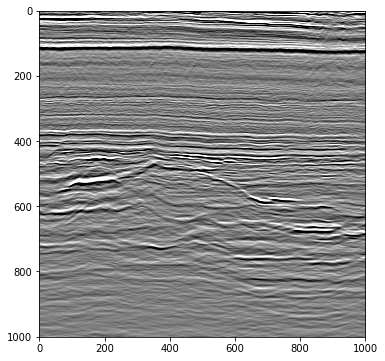

In [14]:
# The inline and xline data can be accessed using numpy-like array slicing. 
# Plot an example inline and xline:


def clip(img):
    """Standardize contrast"""
    img = img - np.mean(img)
    return img/np.std(img)

# These are 8-bit unsigned ints
plt.figure(figsize=(12,6))
plt.imshow(clip(seismic_data['xline'][...,2222].T), cmap='gray', vmin=-2, vmax=2)
plt.show()

# slice data in the xline/inline direction
# Dead traces padded with 0's
plt.figure(figsize=(12,6))
plt.imshow(clip(seismic_data['inline'][...,1499].T), cmap='gray', vmin=-2, vmax=2)
plt.show()


Zarr takes care of caching results. The first time data is accessed, it is transferred from the remote locations. This result is cached so subsequent requests are much faster.

In [15]:
from time import time
st = time()
x = seismic_data['xline'][...,2700]
print ("Elapsed time for first request: {}s".format(time() - st))

st = time()
x = seismic_data['xline'][...,2700]
print ("Elapsed time for second request: {}s".format(time() - st))

Elapsed time for first request: 0.39394521713256836s
Elapsed time for second request: 0.049866676330566406s


## Geospatial data
Some geospatial data is included in the segy data. The cell below creates a shapely polygon (latitude, longitude) bounding the survey.

In [16]:
from shapely.geometry import Polygon
# lat/lon bounding the survey
lati, longi = seismic_data['map_latitude'][:], seismic_data['map_longitude'][:]
points = list(zip(lati, longi))

###  Map Plot

In [17]:
# for this to run, install ipyleaflet on command-line (see above)
from ipyleaflet import Map, Polygon, basemaps

m = Map(
    basemap=basemaps.Esri.WorldImagery,
    center=np.median(points, axis=0).tolist(),
    zoom=6
)

polygon = Polygon(
    locations=points,
    color="red",
    fill_color="green"
)

m.add_layer(polygon)
m

Map(center=[-13.949067585836929, 117.20016613893264], controls=(ZoomControl(options=['position', 'zoom_in_text…

### Explore the Synthetic Data

Notebook from [Ben Lasscock](https://github.com/blasscoc/easy-as/blob/explore/notebooks/Access%20and%20Explore%20Data%20-%20Synthetic.ipynb)

In [18]:
from matplotlib import rc
from scipy.ndimage import gaussian_filter
from scipy.signal import hilbert, morlet
import seaborn as sns

# Big Fonts!
font = {'family' : 'normal',
        'size'   : 18}
rc('font', **font)

In [19]:
def open_zarr(remote_path):
    # complicated stuff to access the data
    client = s3fs.S3FileSystem(anon=True)
    store = s3fs.S3Map(
        root=remote_path,
        s3=client, 
        check=False)
    cache = zarr.LRUStoreCache(store, max_size=2**28)
    return zarr.open_group(store=cache, mode='r')

# These are the ground truth faults
fault_path='s3://zarr-depot/seismic/FaultSynthetic/issap20_Fault'
fault_data = open_zarr(fault_path)

# These are the ground truth faults
seismic_path='s3://zarr-depot/seismic/FaultSynthetic/issap20_Pp'
seismic_data = open_zarr(seismic_path)

# The other AI - Acoustic Impedence
ai_path='s3://zarr-depot/seismic/FaultSynthetic/issap20_AI'
ai_data = open_zarr(ai_path)

# contains the seqy data for Ichthys3D
real_path='s3://zarr-depot/seismic/Ichthys3D/Ichthys 3D seismic for fault competition'
real_data = open_zarr(real_path)

In [193]:
# QC the line ranges
print ("inline range : ", fault_data['inlines'][:].min(), "-", fault_data['inlines'][:].max())
print ("inline range : ", seismic_data['inlines'][:].min(), "-", seismic_data['inlines'][:].max())
print ("inline range : ", ai_data['inlines'][:].min(), "-", ai_data['inlines'][:].max())
print ("inline range : ", real_data['inlines'][:].min(), "-", real_data['inlines'][:].max())

inline range :  1 - 101
inline range :  1 - 101
inline range :  1 - 101
inline range :  1001 - 3400


<function matplotlib.pyplot.show(close=None, block=None)>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


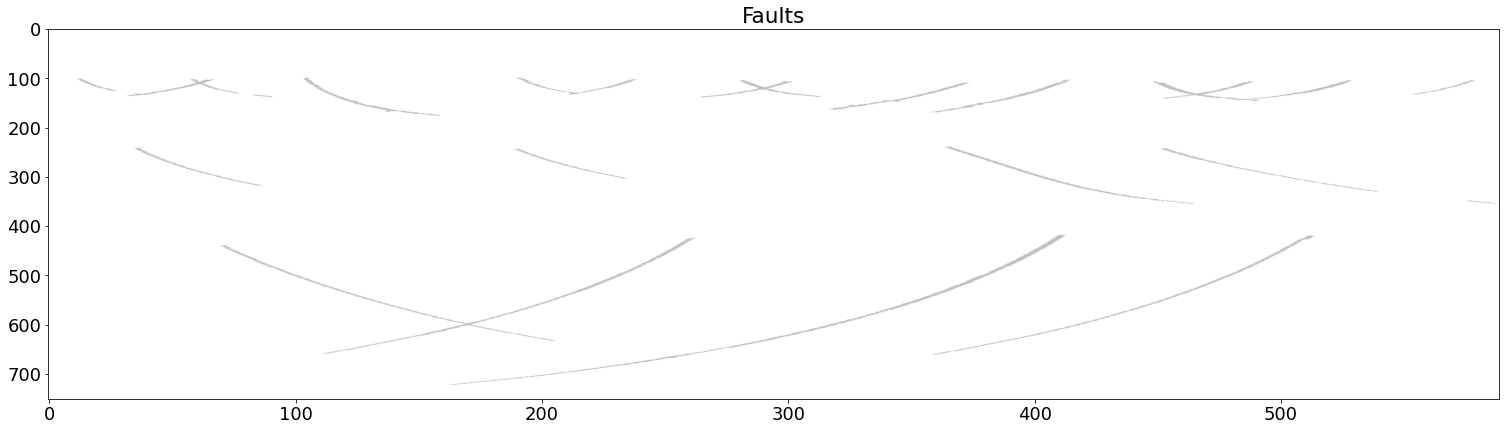

In [22]:
# Lets plot the fault data only
plt.figure(figsize=(26,13))
plt.imshow(fault_data['inline'][...,10].T, cmap='binary', aspect=0.2, alpha=0.25)
plt.title("Faults")
plt.show

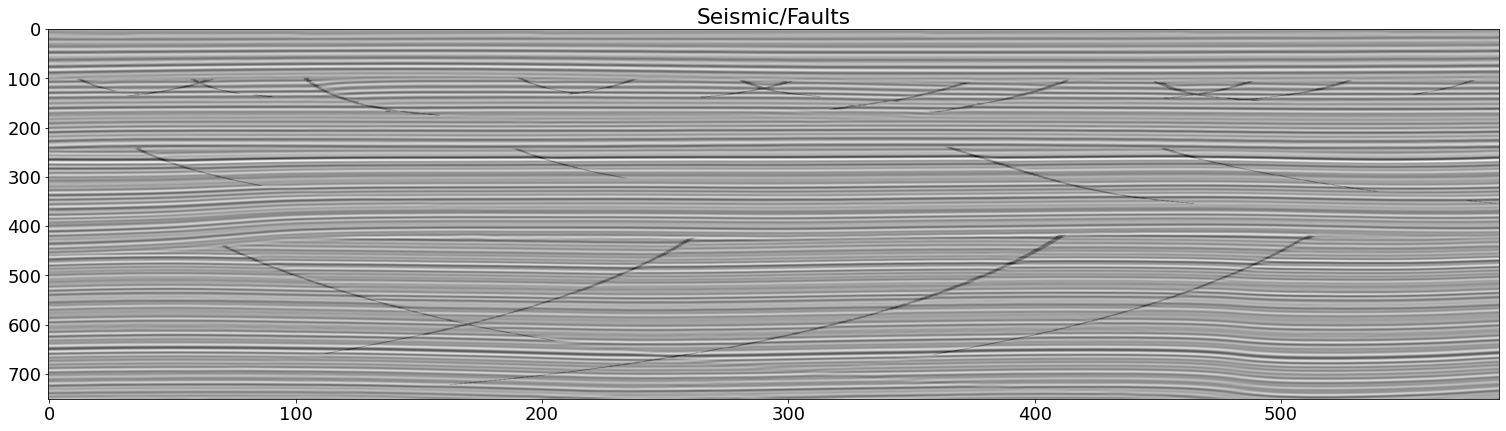

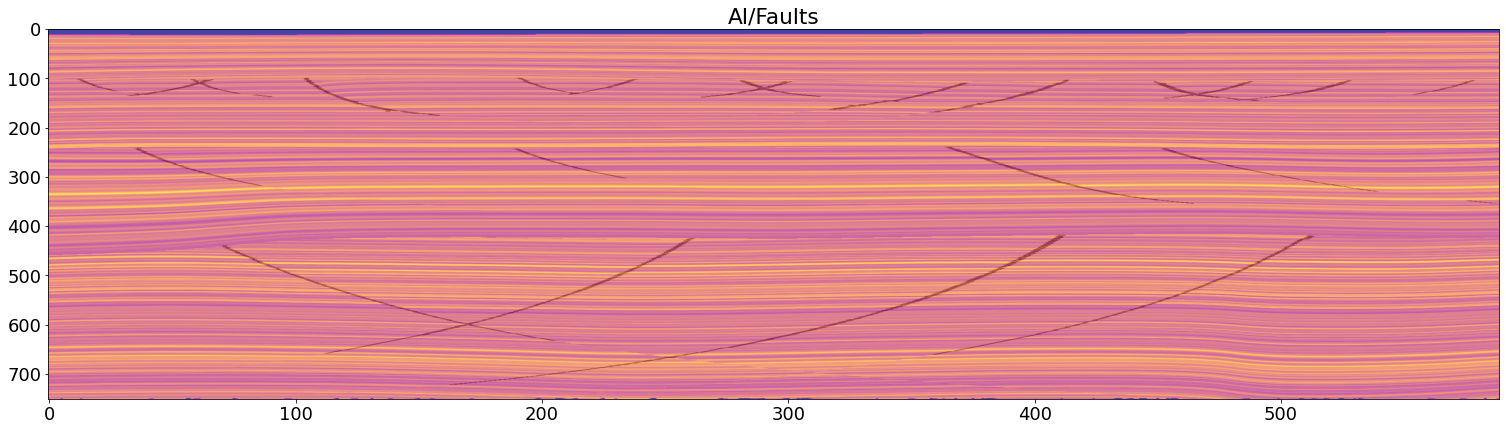

In [25]:
# Visualize the seismic and AI with fault overlay 
# These are 8-bit unsigned ints
plt.figure(figsize=(26,13))
plt.imshow(seismic_data['inline'][...,10].T, cmap='gray', aspect=0.2)
plt.imshow(fault_data['inline'][...,10].T, cmap='binary', aspect=0.2, alpha=0.25)
plt.title("Seismic/Faults")
plt.show()

# These are 8-bit unsigned ints
plt.figure(figsize=(26,13))
plt.imshow(ai_data['inline'][...,10].T, cmap='plasma', aspect=0.2)
plt.imshow(fault_data['inline'][...,10].T, cmap='binary', aspect=0.2, alpha=0.25)
plt.title("AI/Faults")
plt.show()

Here we just compare the seismic wavelet for the compressed versus original precision versions. Also demonstrates how to compute a statistical wavelet.

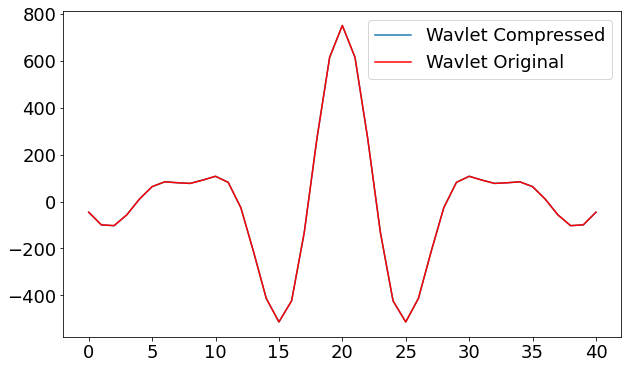

In [39]:
def std(x):
    x = x - np.mean(x)
    return x/np.std(x)

def crop(x, delta):
    N = len(x)
    return x[N//2-delta:N//2+delta+1]

def stat_wav(tracs):
    # standarize so stuff has the same range of values
    return crop(np.correlate(std(tracs), std(tracs), mode='full'), 20)

plt.figure(figsize=(10,6))
tracs = seismic_data['inline'][100,:,10]
wavelet = stat_wav(tracs)
plt.plot(wavelet)
#
tracs = seismic_data['inline_float'][100,:,10]
wavelet_compr = stat_wav(tracs)
plt.plot(wavelet_compr, '-r')
#
plt.legend(["Wavlet Compressed", 
            "Wavlet Original"])
plt.show()

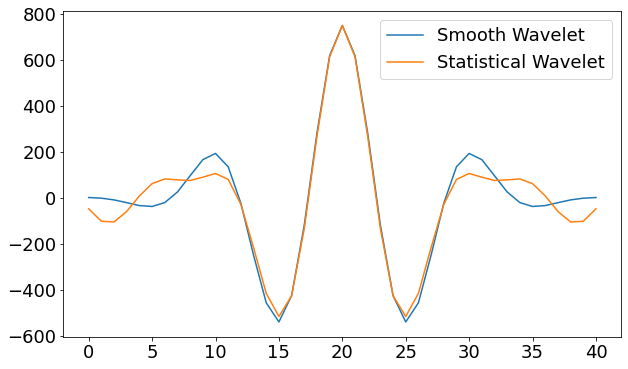

In [40]:
from scipy.optimize import minimize
def func(scale, wavelet):
    mor = morlet(len(wavelet), 3.5, scale).real
    mor *= np.max(wavelet)/mor.max()
    return (np.linalg.norm(mor - wavelet)**2)

# Guess a parameteric wavelet
result = minimize(func, np.array([0.5]), bounds=[(0,1)], args=[wavelet])

# adjust normalization 
smooth_wavelet = morlet(len(wavelet), 3.7, result.x).real
smooth_wavelet *= np.max(wavelet)/smooth_wavelet.max()
smooth_wavelet = smooth_wavelet[:,0]

plt.figure(figsize=(10,6))
plt.plot(smooth_wavelet)
plt.plot(wavelet)
plt.legend(["Smooth Wavelet", "Statistical Wavelet"])
plt.show()

In [41]:
# the original synthetic
seis = seismic_data['inline_float'][...,10]
# Ichthys data and a statistical wavelet
real_tracs = std(real_data['inline'][::20,:,2300])
# flatten the line and compute the acf everywhere to build statistics
real_stat_wavelet = stat_wav(real_tracs.ravel())

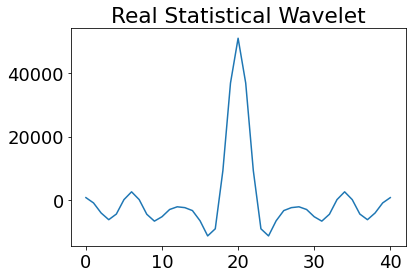

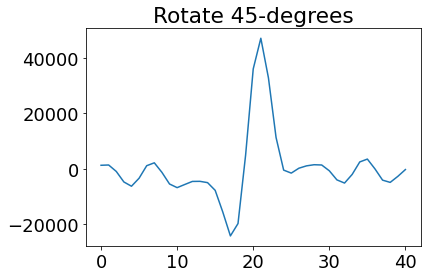

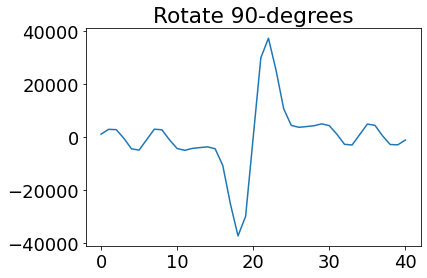

In [42]:
# Plot the real statistical wavelet and mess around with the phase.
# phase rotate using hilbert transform, it's its own inverse
def apply_phase(x, phase):
    # phase should be (-pi,pi)
    return hilbert((hilbert(x)*np.exp(-phase * 1j)).real).real

plt.figure()
plt.plot(real_stat_wavelet)
plt.title("Real Statistical Wavelet")
plt.show()

plt.figure()
plt.plot(apply_phase(real_stat_wavelet, np.pi/4))
plt.title("Rotate 45-degrees")
plt.show()

plt.figure()
plt.plot(apply_phase(real_stat_wavelet, np.pi/2))
plt.title("Rotate 90-degrees")
plt.show()

In [47]:
def spike_conv_model(ai, seis, wavelet):
    # acoustics waves are reflected by an impedance contrast
    dai = gaussian_filter(std(ai), sigma=(0,1), order=1)

    synth = np.zeros(ai.shape)
    for i in range(ai.shape[0]):
        synth[i,:] = np.convolve(dai[i,:], wavelet, mode='same')
    synth *= seis.std()/synth.std()

    return synth

# spike conv model
synth = spike_conv_model(std(ai_data['inline'][:,:,10]), seis, smooth_wavelet)

# sharper spike conv model
sharp_synth = spike_conv_model(std(ai_data['inline'][:,:,10]), seis, real_stat_wavelet)


It's very likely that the synthetics are found by forward modeling, i.e. solving the acoustic wave equation. Compare our "smooth wavelet" spike convolution model to the original synthetic, compare what the synthetic would look like if we use the statistical wavelet from the real Ichthys3D data and compare with a section from the Ichthys3D.

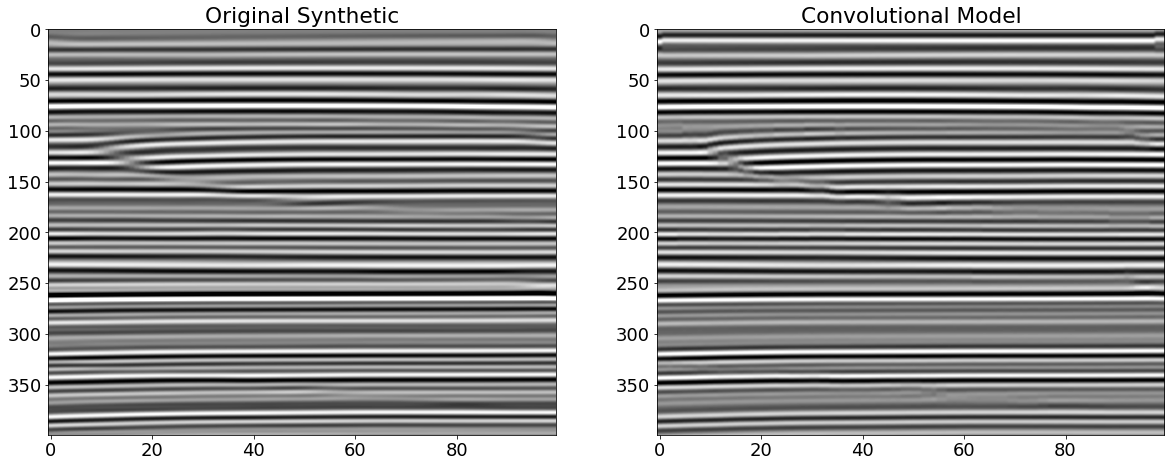

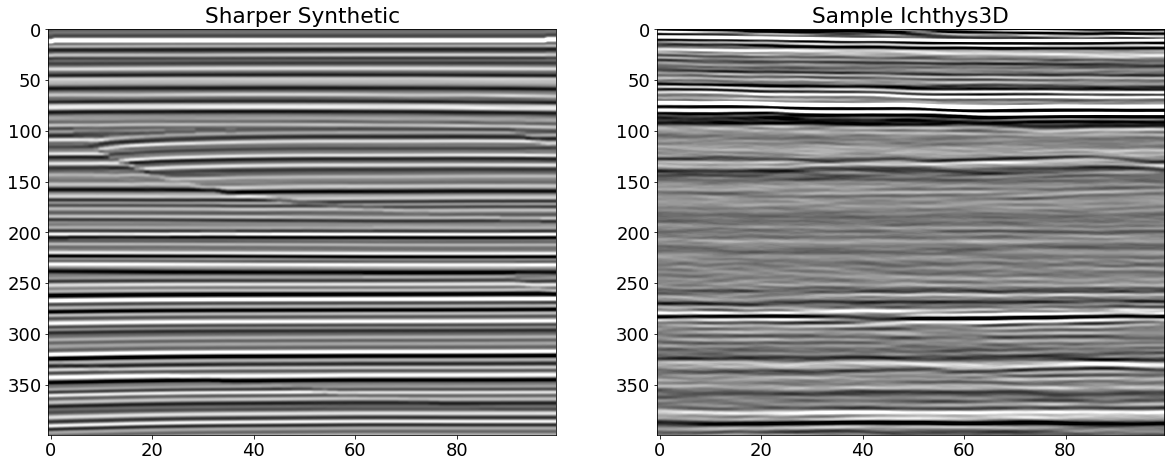

In [48]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 2, 1)
plt.imshow(std(seis[100:200,:400]).T, cmap='gray', aspect=0.2, vmin=-2, vmax=2)
ax.set_title("Original Synthetic")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(std(synth[100:200,:400]).T, cmap='gray', aspect=0.2, vmin=-2, vmax=2)
ax.set_title("Convolutional Model")
plt.show()

real_tracs = std(real_data['inline'][100:200,:400,2300])

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 2, 1)
plt.imshow(std(sharp_synth[100:200,:400]).T, cmap='gray', aspect=0.2, vmin=-2, vmax=2)
ax.set_title("Sharper Synthetic")

ax = fig.add_subplot(1, 2, 2)
plt.imshow(std(real_tracs).T, cmap='gray', aspect=0.2, vmin=-2, vmax=2)
ax.set_title("Sample Ichthys3D")

plt.show()

### Compare bandwidth
Realistically below -20DB is noise

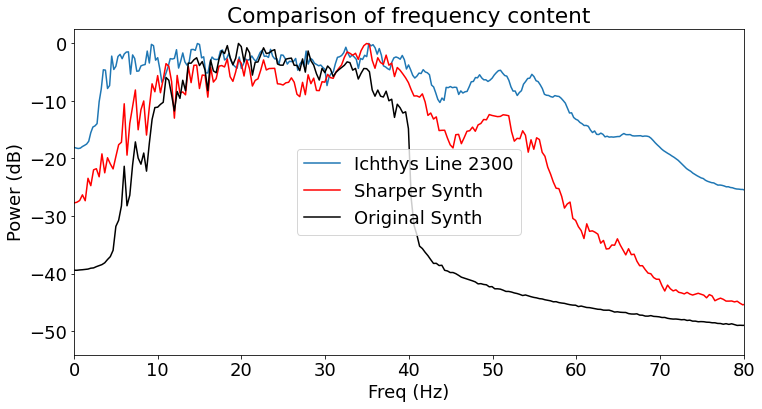

In [49]:
# Ichthys/Synthetics are 4ms sample rate according to binary header:
freqs_synth = np.fft.fftshift(np.fft.fftfreq(751, 0.004))
freqs_real = np.fft.fftshift(np.fft.fftfreq(1001, 0.004))

# I'm going to compute the power spectrum and average over the line
real_tracs = std(real_data['inline'][...,2300])
x = np.zeros(1001)
for i in np.arange(1001):
    x += np.fft.fftshift(np.abs(np.fft.fft(real_tracs[i,:])))
x /= x.max()

y = np.zeros(751)
for i in np.arange(589):
    y += np.fft.fftshift(np.abs(np.fft.fft(sharp_synth[i,:])))
y /= y.max()
    
z = np.zeros(751)
for i in np.arange(589):
    z += np.fft.fftshift(np.abs(np.fft.fft(seis[i,:])))
z /= z.max()
   
plt.figure(figsize=(12,6))
plt.plot(freqs_real[len(x)//2:], 20*np.log10(x[len(x)//2:]))
plt.plot(freqs_synth[len(y)//2:], 20*np.log10(y[len(y)//2:]), '-r')
plt.plot(freqs_synth[len(z)//2:], 20*np.log10(z[len(z)//2:]), '-k')
plt.legend(["Ichthys Line 2300", "Sharper Synth", "Original Synth"])
plt.xlabel("Freq (Hz)")
plt.ylabel("Power (dB)")
plt.title("Comparison of frequency content")
plt.xlim([0,80])
plt.show()

### Compare reflectivity synth/real

c:\users\smnge\anaconda3\envs\torch\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\smnge\anaconda3\envs\torch\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\smnge\anaconda3\envs\torch\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

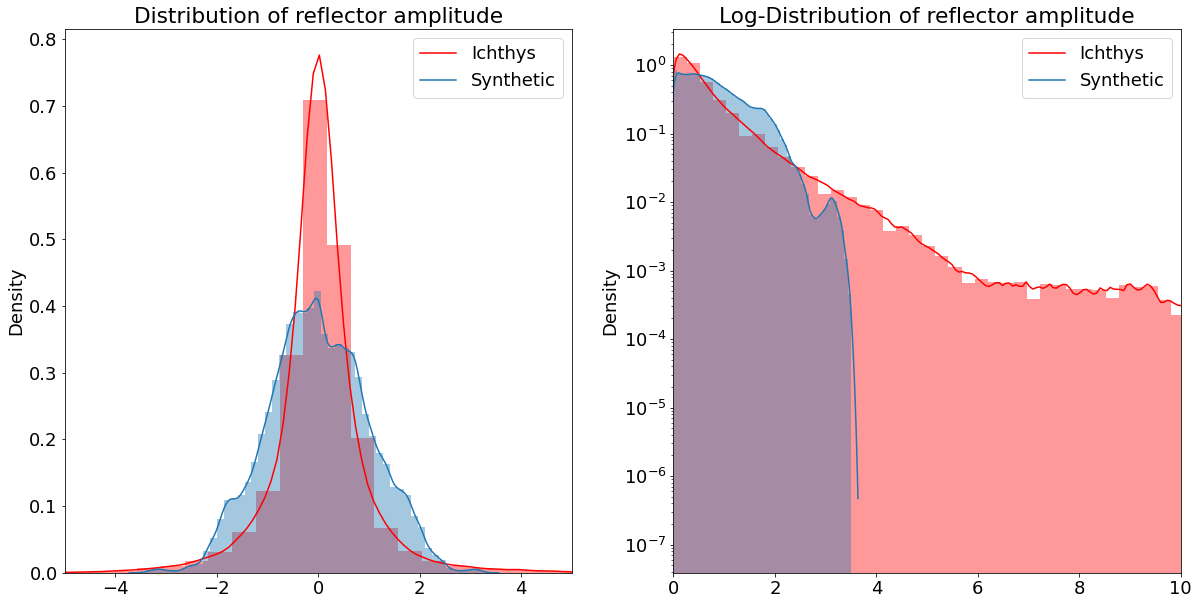

In [53]:
import seaborn as sns

# the original synthetic
seis = seismic_data['inline_float'][...,10]
# spike conv model
real_tracs = std(real_data['inline'][...,2300])


fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(1, 2, 1)
sns.distplot(std(real_tracs.ravel()), color='red', ax=ax)
sns.distplot(std(seis.ravel()), ax=ax)
ax.set_title("Distribution of reflector amplitude")
ax.legend(["Ichthys", "Synthetic"])
ax.set_xlim([-5,5])


ax = fig.add_subplot(1, 2, 2)
sns.distplot(np.abs(std(real_tracs.ravel())), color='red', ax=ax)
sns.distplot(np.abs(std(seis.ravel())), ax=ax)
ax.set_xlim([0,10])
ax.set_title("Log-Distribution of reflector amplitude")
ax.set_yscale('log')
ax.legend(["Ichthys", "Synthetic"])
plt.show()

#Warning, the distplot will be replaced by histplot in the future!!!